# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [ ]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent DEVO CAMBIARE SIGMA
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

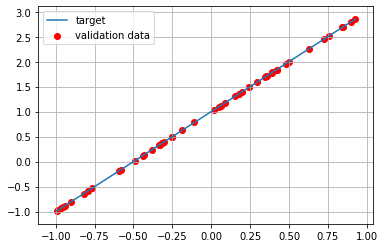

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [1]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

C:\Users\Utente\Desktop\Numerical Simulation Laboratory\exercise_11\mytf\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 1s 2ms/sample - loss: 2.8381 - mse: 2.8381 - val_loss: 2.1108 - val_mse: 2.1108
Epoch 2/30
500/500 [==============================] - 0s 149us/sample - loss: 2.0854 - mse: 2.0854 - val_loss: 1.5782 - val_mse: 1.5782
Epoch 3/30
500/500 [==============================] - 0s 278us/sample - loss: 1.5690 - mse: 1.5690 - val_loss: 1.2133 - val_mse: 1.2133
Epoch 4/30
500/500 [==============================] - 0s 152us/sample - loss: 1.2090 - mse: 1.2090 - val_loss: 0.9460 - val_mse: 0.9460
Epoch 5/30
500/500 [==============================] - 0s 151us/sample - loss: 0.9415 - mse: 0.9415 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 6/30
500/500 [==============================] - 0s 148us/sample - loss: 0.7416 - mse: 0.7416 - val_loss: 0.5932 - val_mse: 0.5932
Epoch 7/30
500/500 [==============================] - 0s 151us/sample - loss: 0.5878 - mse: 0.5878 - val_loss: 0.4740 - val_mse: 0.4740
Epoch

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9007823]], dtype=float32), array([0.99906874], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

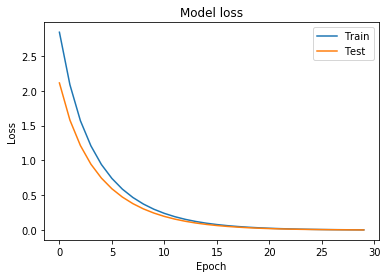

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

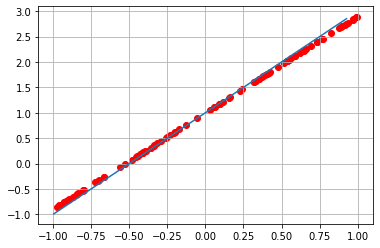

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

## Solutions

### Exercise 11.1

In [29]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

plt.rcParams.update({'font.size': 22})

I explored how the performance of a simple linear regression neural network depends on: number of epochs, number of data points and noise level.

More epochs → Lower loss, better generalization on validation data.

More data points → Smoother learning, improved accuracy.

More noise → Makes training harder, but increasing epochs and data points helps reduce its impact.


Increasing epochs and dataset size improves model performance, especially in noisy conditions. Training longer clearly leads to lower loss and better generalization. 

When increasing the number of epochs or using larger models, I need to pay attention to overfitting.  If the validation loss starts increasing while the training loss keeps decreasing, the model is starting to overfit. To avoid this, I should use techniques like EarlyStopping to stop training automatically when overfitting is detected.

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

n_train = 1000 # number of training samples

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent DEVO CAMBIARE SIGMA
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [3]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=15,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0)

C:\Users\Utente\Desktop\Numerical Simulation Laboratory\exercise_11\mytf\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

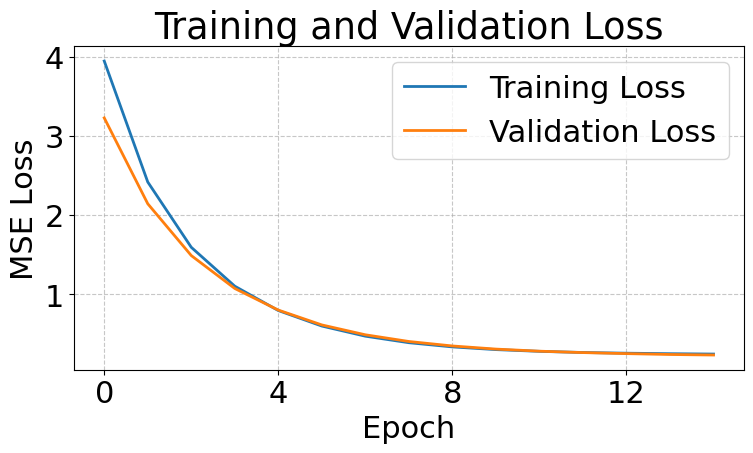

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


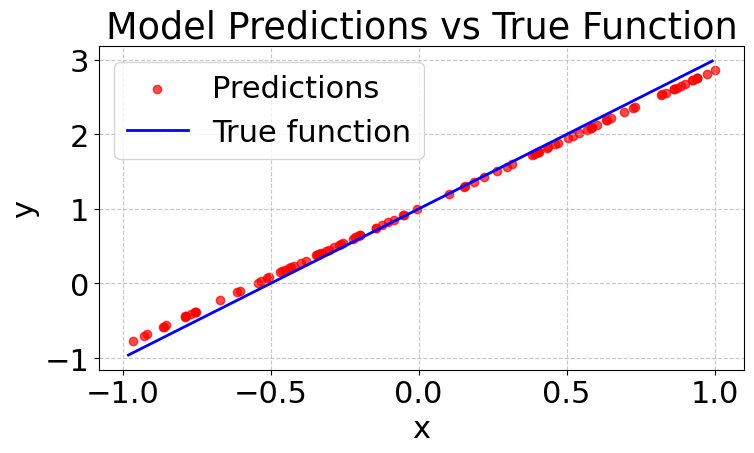

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 15 + 1, step=4))  
plt.tight_layout()
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(8, 5))
plt.scatter(x_predicted, y_predicted, color='red', alpha=0.7, label='Predictions')
plt.plot(x_valid, y_target, color='blue', linewidth=2, label='True function')
plt.title('Model Predictions vs True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Exercise 11.2

I extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.


- Architecture
  - 2 hidden layers, each with **30 neurons**
  - Activation function: `'tanh'`
  - Output layer: 1 neuron (no activation for regression)
- Optimizer: `adam`
- Loss function: Mean Squared Error (`mse`), standard for regression
  Training data: 500 noisy samples uniformly sampled in $$[-1,1]$$
- Validation data: Points inside the training range




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 30)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,021 (3.99 KB)

 Trainable params: 1,021 (3.99 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


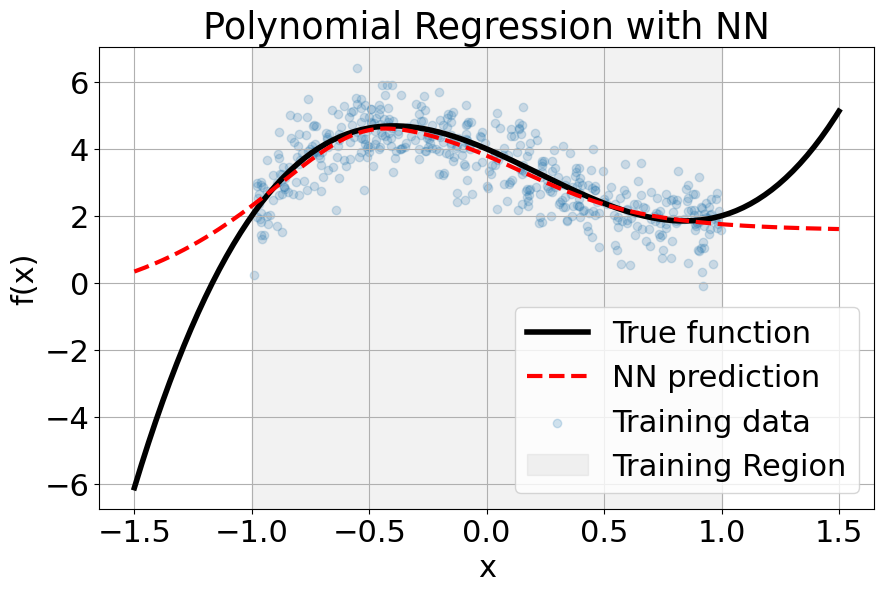

In [37]:
#  target: f(x) = 4 - 3x - 2x^2 + 3x^3
def target_function(x):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

np.random.seed(0)
n_train = 500
x_train = np.random.uniform(-1, 1, n_train)
sigma = 0.7
y_train = target_function(x_train) + np.random.normal(0, sigma, n_train)

x_test = np.linspace(-1.5, 1.5, 200) 
x_valid = np.linspace(-1.5, 1.5, 200)
inside_mask = (x_test >= -1) & (x_test <= 1)
y_valid = target_function(x_valid[inside_mask]) + np.random.normal(0, sigma, len(x_valid[inside_mask]))

model = Sequential()
model.add(Dense(30, input_shape=(1,), activation='tanh'))  # hidden layer 1
model.add(Dense(30, input_shape=(30,), activation='tanh'))  # hidden layer 2
model.add(Dense(1))  # output layer 

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=200,
    validation_data=(x_valid[inside_mask], y_valid),
    shuffle=True,
    verbose = 0
)

y_test = target_function(x_valid)
y_pred = model.predict(x_test)

plt.figure(figsize=(10,6))
plt.plot(x_test, y_test, label='True function', linewidth=4, color =  'black')
plt.plot(x_test, y_pred, label='NN prediction', linestyle='--', color = 'red', lw=3)
plt.scatter(x_train, y_train, alpha=0.2, label='Training data')
plt.axvspan(-1, 1, color='gray', alpha=0.1, label='Training Region')
plt.title("Polynomial Regression with NN")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

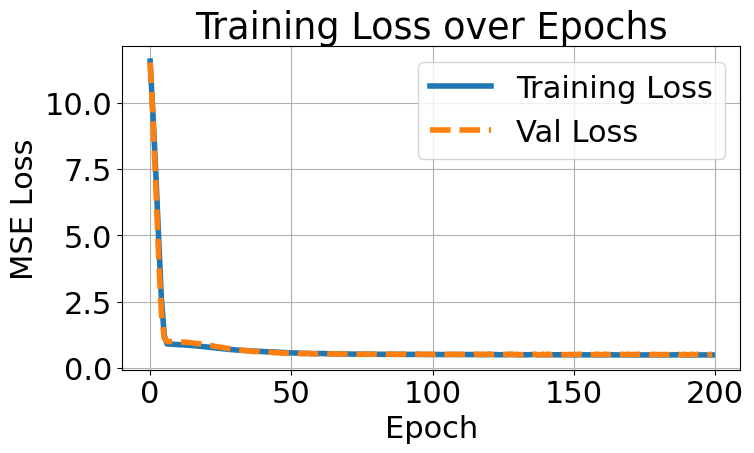

In [38]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', lw = 4)
plt.plot(history.history['val_loss'], label='Val Loss', linestyle = '--', lw=4)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
inside_mask = (x_test >= -1) & (x_test <= 1)
outside_mask = ~inside_mask

mse_inside = np.mean((y_test[inside_mask] - y_pred[inside_mask])**2)
mse_outside = np.mean((y_test[outside_mask] - y_pred[outside_mask])**2)

mse_inside, mse_outside

(np.float64(1.9753459883212674), np.float64(9.549806912744236))


The neural network model demonstrated excellent performance in fitting the target cubic polynomial within the training domain of $[-1, 1]$. The training and validation loss decreased, indicating proper convergence without overfitting. However, when tested on points outside the training range, the model's predictive accuracy dropped significantly. This highlights a key concept in machine learning: a model's ability to generalize well is strongly tied to the diversity and coverage of its training data. The model never saw those regions during training, this leads to poor generalization outside the data it was trained on. 
This behavior is confirmed by the Mean Squared Error (MSE calculated for predictions inside and outside the training range: MSE inside $[-1, 1]: \quad \approx  1.97$ and MSE outside $[-1, 1]: \quad \approx 10.15$

Increasing the model complexity (e.g., more layers or neurons) may improve fit on the training set but does not guarantee better generalization, especially outside the original domain.
In conclusion, good generalization requires a balance between model complexity and the diversity of the training dataset. If I want good predictions outside $[-1, 1]$, I need to include those regions in the training data.



The plot above shows the difference between the true values and the neural network predictions outside the training domain. As you can see, the errors increase with distance from the training interval.


### Exercise 11.3

I extended the use of neural networks to approximate a 2D trigonometric function defined as:

$$
f(x, y) = \sin(x^2 + y^2)
$$

The training data were randomly sampled in the range:

- $x \in [-1.5, 1.5]$
- $y \in [-1.5, 1.5]$

#### Model Architecture
- Input Layer: 2 neurons (corresponding to x and y)
- Hidden Layers: 2 layers, 64 neurons each, tanh activation
- Output Layer: 1 neuron (predicts f(x, y))

The model was compiled with Adam optimizer and Mean Squared Error (MSE) loss function, trained for 200 epochs with a batch size of 32.




In [27]:
#  target
def f(x, y):
    return np.sin(x**2 + y**2)

# Dati di training
np.random.seed(0)
n_train = 2000
x_train = np.random.uniform(-1.5, 1.5, n_train)
y_train = np.random.uniform(-1.5, 1.5, n_train)
X_train = np.vstack((x_train, y_train)).T  # Stack arrays in sequence vertically (row wise).
z_train = f(x_train, y_train)

grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_inputs = np.vstack([grid_x.ravel(), grid_y.ravel()]).T  # .ravel() Return a contiguous flattened array.
z_true = f(grid_inputs[:, 0], grid_inputs[:, 1])

model = Sequential([
    Input(shape=(2,)),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, z_train, epochs=200, batch_size=32, validation_data=(grid_inputs, z_true), verbose=0)



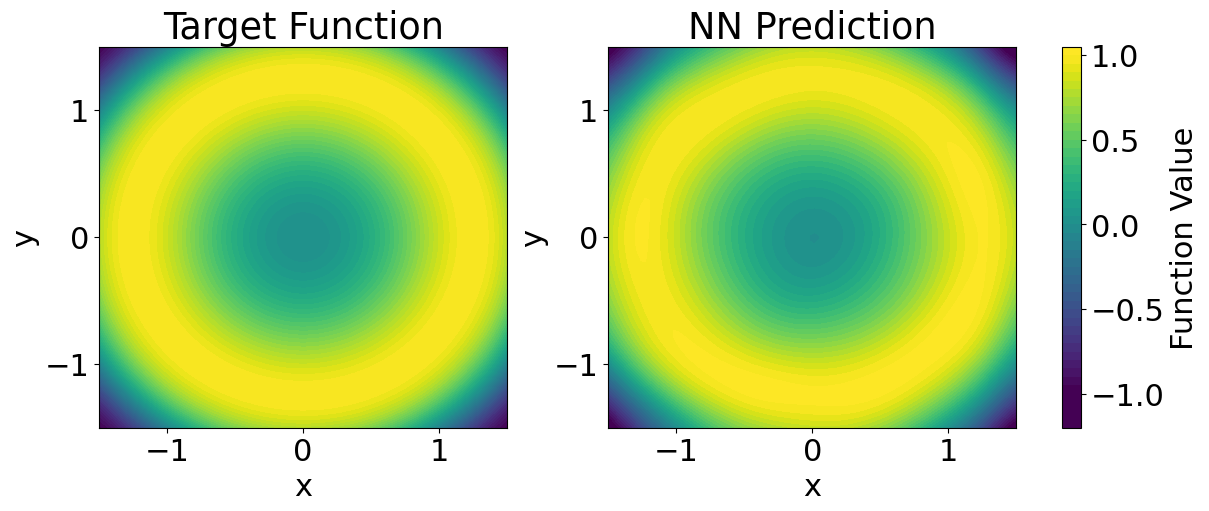

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

z_min, z_max = z_true.min(), z_true.max()
ticks = [-1, -0.5, 0, 0.5, 1]#np.linspace(z_min, z_max, 6)

c1 = axs[0].contourf(grid_x, grid_y, z_true.reshape(100, 100), levels=50, cmap='viridis', vmin=z_min, vmax=z_max)
axs[0].set_title("Target Function")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_yticks([-1,0,1])

c2 = axs[1].contourf(grid_x, grid_y, z_pred.reshape(100, 100), levels=50, cmap='viridis', vmin=z_min, vmax=z_max)
axs[1].set_title("NN Prediction")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_yticks([-1,0,1])

# Una sola colorbar per entrambi
cbar = fig.colorbar(c2, ax=axs, orientation='vertical', ticks=ticks)
cbar.set_label('Function Value')

plt.show()


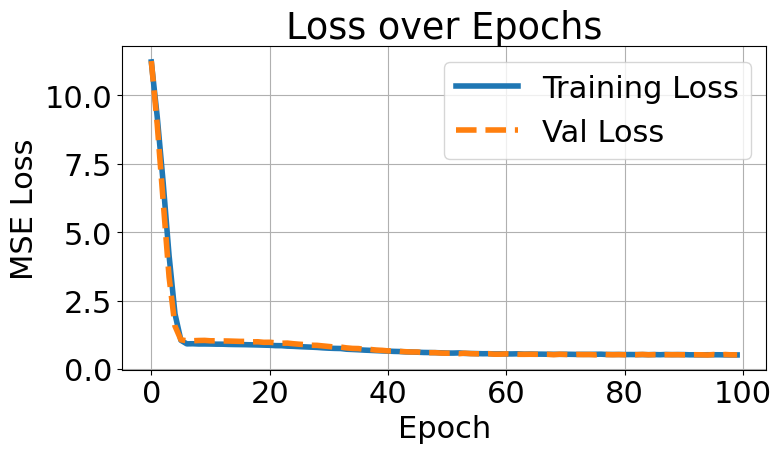

In [33]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', lw = 4)
plt.plot(history.history['val_loss'], label='Val Loss', linestyle = '--', lw=4)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The trained neural network successfully learned the underlying trigonometric pattern The visual comparison between the true function and the neural network prediction shows a close match. The contour plots of both functions align well, indicating that the model generalized properly over the entire 2D space.
